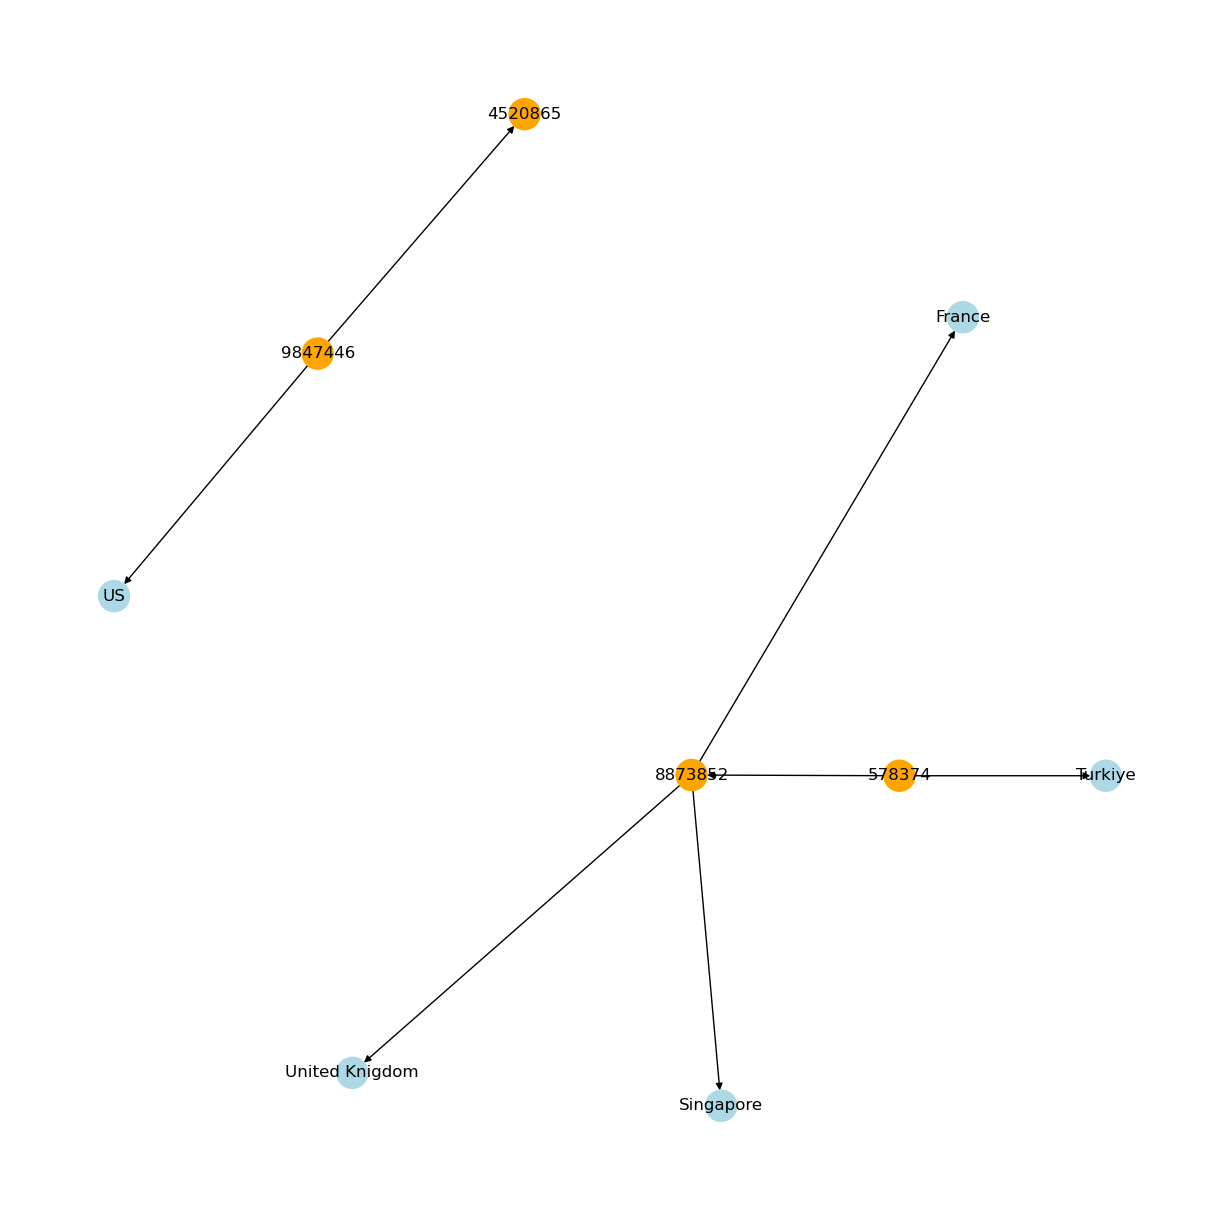

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import json

# Assuming `data` is your JSON data loaded into a Python dictionary
data = {
    "results": {
        "bindings": [
            {
                "app": {
                    "type": "literal",
                    "value": "9847446"
                },
                "country": {
                    "type": "literal",
                    "value": "US"
                },
                "upappid": {
                    "type": "literal",
                    "value": "4520865"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "US"
                }
            },
            {
                "app": {
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "Singapore"
                }
            },
            {
                "app": {
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "US"
                }
            },
            {
                "app" :{
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "United Knigdom"
                }
            },
            {
                "app": {
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "France"
                }
            }
        ]
    }
}

# Create a new graph
G = nx.DiGraph()

# Add nodes and edges from the data
for entry in data['results']['bindings']:
    app = entry['app']['value']
    country = entry['country']['value']
    upapp = entry['upappid']['value']
    upcountry = entry['upcountry']['value']

    # Add nodes for apps and countries if they don't exist
    if not G.has_node(app):
        G.add_node(app, type='app')
    if not G.has_node(country):
        G.add_node(country, type='country')
    
    # Add edge from app to country
    G.add_edge(app, country)

    # Add nodes and edges for upapp if it doesn't exist
    if upapp and not G.has_node(upapp):
        G.add_node(upapp, type='app')
        G.add_edge(app, upapp)
    if upcountry and not G.has_node(upcountry):
        G.add_node(upcountry, type='country')
        G.add_edge(upapp, upcountry)

# Define the node color based on the node type
color_map = ['orange' if G.nodes[node]['type'] == 'app' else 'lightblue' for node in G]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color=color_map, node_size=500)
plt.show()


In [10]:
import json
from collections import defaultdict

# Assuming `data` is the loaded JSON data.
data = {
    "results": {
        "bindings": [
            {
                "app": {
                    "type": "literal",
                    "value": "9847446"
                },
                "country": {
                    "type": "literal",
                    "value": "US"
                },
                "upappid": {
                    "type": "literal",
                    "value": "4520865"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "US"
                }
            },
            {
                "app": {
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "Singapore"
                }
            },
            {
                "app": {
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "US"
                }
            },
            {
                "app" :{
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "United Knigdom"
                }
            },
            {
                "app": {
                    "type": "literal",
                    "value": "578374"
                },
                "country": {
                    "type": "literal",
                    "value": "Turkiye"
                },
                "upappid": {
                    "type": "literal",
                    "value": "8873852"
                },
                "upcountry": {
                    "type": "literal",
                    "value": "France"
                }
            }
        ]
    }
}

# Process the data to group apps by country and establish app connections
country_to_apps = defaultdict(list)
app_connections = []

for entry in data['results']['bindings']:
    app = entry['app']['value']
    country = entry['country']['value']
    upapp = entry.get('upappid', {}).get('value')
    
    # Group apps by their country
    country_to_apps[country].append(app)
    
    # Store the connections between apps
    if upapp:
        app_connections.append((app, upapp))

# Prepare the data for visualization
country_bubbles = []
app_bubbles = []
for country, apps in country_to_apps.items():
    # Create a bubble for each country
    country_bubbles.append({
        'type': 'country',
        'label': country,
        'size': len(apps)  # Size can be based on the number of apps
    })
    # Create a bubble for each app
    for app in apps:
        app_bubbles.append({
            'type': 'app',
            'label': app,
            'parent': country,
            'size': 1  # Static size for apps
        })

# Now, let's move to visualization using Plotly.


In [11]:
import plotly.graph_objects as go

# Initialize figure
fig = go.Figure()

# Add country bubbles
for bubble in country_bubbles:
    fig.add_trace(go.Scatter(
        x=[bubble['label']],  # Place it according to your layout needs
        y=[bubble['label']],
        marker=dict(size=bubble['size']),
        mode='markers+text',
        text=bubble['label'],
        name=bubble['type']
    ))

# Add app bubbles
for bubble in app_bubbles:
    fig.add_trace(go.Scatter(
        x=[bubble['parent']],  # Position it within the parent country bubble
        y=[bubble['label']],
        marker=dict(size=bubble['size']),
        mode='markers+text',
        text=bubble['label'],
        name=bubble['type']
    ))

# Add lines for app connections
for source, target in app_connections:
    fig.add_trace(go.Scatter(
        x=[source, target],  # Adjust positions to your layout
        y=[source, target],
        mode='lines',
        line=dict(width=2, color='gray'),
        name='connection'
    ))

# Update layout for a nice and tidy look
fig.update_layout(
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Show figure
fig.show()


In [19]:
import pandas as pd
from io import StringIO
import json

# Your CSV data
csv_data = """
app,country,upappid,upappcountry
10269148,United States of America,242101,United Kingdom
10269148,United States of America,10267158,United Kingdom
572803,United States of America,242344,United States of America
572803,United States of America,237478,United Kingdom
572803,United States of America,11244915,United Kingdom
8684394,Poland,10390944,United Kingdom
10897069,United Kingdom,237487,United Kingdom
10897069,United Kingdom,1625663,United Kingdom
877118,United Kingdom,241857,United Kingdom
877118,United Kingdom,237479,United Kingdom
"""

# Convert CSV data to DataFrame
df = pd.read_csv(StringIO(csv_data))

# Process data to get a list of apps by country with upstream apps and their countries
apps_data = df.groupby(['app', 'country']).apply(lambda x: x[['upappid', 'upappcountry']].values.tolist()).reset_index()
apps_data.columns = ['app', 'country', 'upstream']

# Convert the upstream data to the required format
series_data = []
for country, group in apps_data.groupby('country'):
    data = []
    for _, row in group.iterrows():
        upstream_data = [{'upappid': up[0], 'upappcountry': up[1]} for up in row['upstream']]
        data.append({
            'name': str(row['app']),
            'value': len(row['upstream']),  # Setting value based on the number of upstream items
            'upstream': upstream_data
        })
    series_data.append({'name': country, 'data': data})

# Convert series data to JSON
json_data = json.dumps(series_data, indent=4)
print(json_data)

# Writing to a JSON file
with open('data.json', 'w') as f:
    f.write(json_data)


[
    {
        "name": "Poland",
        "data": [
            {
                "name": "8684394",
                "value": 1,
                "upstream": [
                    {
                        "upappid": 10390944,
                        "upappcountry": "United Kingdom"
                    }
                ]
            }
        ]
    },
    {
        "name": "United Kingdom",
        "data": [
            {
                "name": "877118",
                "value": 2,
                "upstream": [
                    {
                        "upappid": 241857,
                        "upappcountry": "United Kingdom"
                    },
                    {
                        "upappid": 237479,
                        "upappcountry": "United Kingdom"
                    }
                ]
            },
            {
                "name": "10897069",
                "value": 2,
                "upstream": [
                    {
                        "upapp

In [21]:
import pandas as pd
from io import StringIO
from collections import defaultdict

# Sample CSV data
data = """
app,country,upappid,upappcountry
10269148,United States of America,242101,United Kingdom
10269148,United States of America,10267158,United Kingdom
572803,United States of America,242344,United States of America
572803,United States of America,237478,United Kingdom
572803,United States of America,11244915,United Kingdom
8684394,Poland,10390944,United Kingdom
10897069,United Kingdom,237487,United Kingdom
10897069,United Kingdom,1625663,United Kingdom
877118,United Kingdom,241857,United Kingdom
877118,United Kingdom,237479,United Kingdom
"""

# Read the data into a DataFrame
df = pd.read_csv(StringIO(data))

# Calculate counts and prepare data for tree structure
# 1. Count apps per country
apps_per_country = df.groupby('country')['app'].nunique().sort_values(ascending=False)

# 2. For each app, count unique upstream countries
apps_data = defaultdict(lambda: defaultdict(set))
for _, row in df.iterrows():
    apps_data[row['country']][row['app']].add(row['upappcountry'])

# 3. For each upstream country, count unique upstream apps
upapp_data = defaultdict(lambda: defaultdict(set))
for country, apps in apps_data.items():
    for app, upcountries in apps.items():
        for upcountry in upcountries:
            upapp_data[country][upcountry].add(app)

# Convert data to a format suitable for visualization
tree_data = []
for country, apps_count in apps_per_country.items():
    country_node = {
        "name": country, 
        "children": []
    }
    for app in apps_data[country]:
        app_node = {
            "name": str(app), 
            "children": []
        }
        for upcountry in apps_data[country][app]:
            upcountry_node = {
                "name": upcountry, 
                "children": [{"name": str(upapp), "value": 1} for upapp in upapp_data[country][upcountry]]
            }
            app_node["children"].append(upcountry_node)
        country_node["children"].append(app_node)
    tree_data.append(country_node)

tree_data

with open('data_tree.json', 'w') as f:
    f.write(json.dumps(tree_data, indent=4))



In [23]:
import json

# Load your JSON data here
# For example: with open('your_json_file.json', 'r') as f:
#                  tree_data = json.load(f)

tree_data = [
    {
        "name": "United Kingdom",
        "children": [
            {
                "name": "10897069",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "10897069",
                                "value": 1
                            },
                            {
                                "name": "877118",
                                "value": 1
                            }
                        ]
                    }
                ]
            },
            {
                "name": "877118",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "10897069",
                                "value": 1
                            },
                            {
                                "name": "877118",
                                "value": 1
                            }
                        ]
                    }
                ]
            }
        ]
    },
    {
        "name": "United States of America",
        "children": [
            {
                "name": "10269148",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "572803",
                                "value": 1
                            },
                            {
                                "name": "10269148",
                                "value": 1
                            }
                        ]
                    }
                ]
            },
            {
                "name": "572803",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "572803",
                                "value": 1
                            },
                            {
                                "name": "10269148",
                                "value": 1
                            }
                        ]
                    },
                    {
                        "name": "United States of America",
                        "children": [
                            {
                                "name": "572803",
                                "value": 1
                            }
                        ]
                    }
                ]
            }
        ]
    },
    {
        "name": "Poland",
        "children": [
            {
                "name": "8684394",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "8684394",
                                "value": 1
                            }
                        ]
                    }
                ]
            }
        ]
    }
]

def process_node(node, parent_id, flat_list):
    node_id = node['name']
    # Add the current node to the flat list
    flat_list.append({
        'id': node_id,
        'parent': parent_id,
        'name': node.get('name'),
        'value': node.get('value', 1)  # Assuming default value 1 for all nodes
    })
    # Recursively process child nodes
    for child in node.get('children', []):
        process_node(child, node_id, flat_list)

# Initialize the flat list and process each top-level node
flat_tree_data = []
for node in tree_data:
    process_node(node, '', flat_tree_data)

# Convert the flat list to JSON
flat_tree_json = json.dumps(flat_tree_data, indent=4)

# You can print out the result or write it to a file
print(flat_tree_json)

with open('data_flat_tree.json', 'w') as f:
    f.write(flat_tree_json)


[
    {
        "id": "United Kingdom",
        "parent": "",
        "name": "United Kingdom",
        "value": 1
    },
    {
        "id": "10897069",
        "parent": "United Kingdom",
        "name": "10897069",
        "value": 1
    },
    {
        "id": "United Kingdom",
        "parent": "10897069",
        "name": "United Kingdom",
        "value": 1
    },
    {
        "id": "10897069",
        "parent": "United Kingdom",
        "name": "10897069",
        "value": 1
    },
    {
        "id": "877118",
        "parent": "United Kingdom",
        "name": "877118",
        "value": 1
    },
    {
        "id": "877118",
        "parent": "United Kingdom",
        "name": "877118",
        "value": 1
    },
    {
        "id": "United Kingdom",
        "parent": "877118",
        "name": "United Kingdom",
        "value": 1
    },
    {
        "id": "10897069",
        "parent": "United Kingdom",
        "name": "10897069",
        "value": 1
    },
    {
        "id": "8

In [26]:
import json
from collections import deque

# Sample JSON data; replace this with your actual data
tree_data = [
    {
        "name": "United Kingdom",
        "children": [
            {
                "name": "10897069",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "10897069",
                                "value": 1
                            },
                            {
                                "name": "877118",
                                "value": 1
                            }
                        ]
                    }
                ]
            },
            {
                "name": "877118",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "10897069",
                                "value": 1
                            },
                            {
                                "name": "877118",
                                "value": 1
                            }
                        ]
                    }
                ]
            }
        ]
    },
    {
        "name": "United States of America",
        "children": [
            {
                "name": "10269148",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "572803",
                                "value": 1
                            },
                            {
                                "name": "10269148",
                                "value": 1
                            }
                        ]
                    }
                ]
            },
            {
                "name": "572803",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "572803",
                                "value": 1
                            },
                            {
                                "name": "10269148",
                                "value": 1
                            }
                        ]
                    },
                    {
                        "name": "United States of America",
                        "children": [
                            {
                                "name": "572803",
                                "value": 1
                            }
                        ]
                    }
                ]
            }
        ]
    },
    {
        "name": "Poland",
        "children": [
            {
                "name": "8684394",
                "children": [
                    {
                        "name": "United Kingdom",
                        "children": [
                            {
                                "name": "8684394",
                                "value": 1
                            }
                        ]
                    }
                ]
            }
        ]
    }
]

def generate_flat_tree(hierarchical_data):
    flat_tree = []
    id_map = {}
    queue = deque([(None, node) for node in hierarchical_data])

    while queue:
        parent_id, current_node = queue.popleft()
        # Generate a unique ID for the current node
        node_id = current_node['name'] + "_" + (parent_id if parent_id else "root")
        if node_id in id_map:
            # If the ID already exists, append a counter to make it unique
            counter = id_map[node_id]
            id_map[node_id] += 1
            node_id += f"_{counter}"
        else:
            id_map[node_id] = 1

        # Add the current node to the flat tree structure
        flat_tree.append({
            'id': node_id,
            'parent': parent_id,
            'name': current_node['name']
            # Include other properties as needed, e.g., 'value': current_node.get('value', 1)
        })

        # Queue children with the current node's ID as their parent ID
        for child in current_node.get('children', []):
            queue.append((node_id, child))

    return flat_tree

# Transform the hierarchical data to a flat structure
flat_tree_data = generate_flat_tree(tree_data)

# Convert the flat list to JSON and print it
flat_tree_json = json.dumps(flat_tree_data, indent=4)
print(flat_tree_json)
with open('data_flat_tree.json', 'w') as f:
    f.write(flat_tree_json)


[
    {
        "id": "United Kingdom_root",
        "parent": null,
        "name": "United Kingdom"
    },
    {
        "id": "United States of America_root",
        "parent": null,
        "name": "United States of America"
    },
    {
        "id": "Poland_root",
        "parent": null,
        "name": "Poland"
    },
    {
        "id": "10897069_United Kingdom_root",
        "parent": "United Kingdom_root",
        "name": "10897069"
    },
    {
        "id": "877118_United Kingdom_root",
        "parent": "United Kingdom_root",
        "name": "877118"
    },
    {
        "id": "10269148_United States of America_root",
        "parent": "United States of America_root",
        "name": "10269148"
    },
    {
        "id": "572803_United States of America_root",
        "parent": "United States of America_root",
        "name": "572803"
    },
    {
        "id": "8684394_Poland_root",
        "parent": "Poland_root",
        "name": "8684394"
    },
    {
        "id": "Uni

In [4]:
import pandas as pd
import json
df = pd.read_csv('./visdata.csv')
# Let's redefine the create_hierarchy function and then proceed with the transformation
def create_hierarchy(df):
    hierarchy = []
    for country in df['country'].unique():
        country_data = {"id": country, "text": country, "parent": ""}
        apps = df[df['country'] == country]['app'].unique()
        app_data = [{"id": str(app), "text": str(app), "parent": country} for app in apps]

        upapp_countries = []
        for app in apps:
            upapp_country_data = df[(df['country'] == country) & (df['app'] == app)]['upappcountry'].unique()
            upapp_countries.extend([{"id": uac + "_" + str(app), 
                                     "text": uac, "parent": str(app), "value": 10} for uac in upapp_country_data])

        hierarchy.append(country_data)
        hierarchy.extend(app_data)
        hierarchy.extend(upapp_countries)

    return hierarchy

# Transform the data
hierarchical_data = create_hierarchy(df)

# Convert to JSON
json_data = json.dumps(hierarchical_data, indent=4)
json_data[:500]  # Displaying a portion of the data for brevity

# Writing to a JSON file
with open('datanew.json', 'w') as f:
    f.write(json_data)
